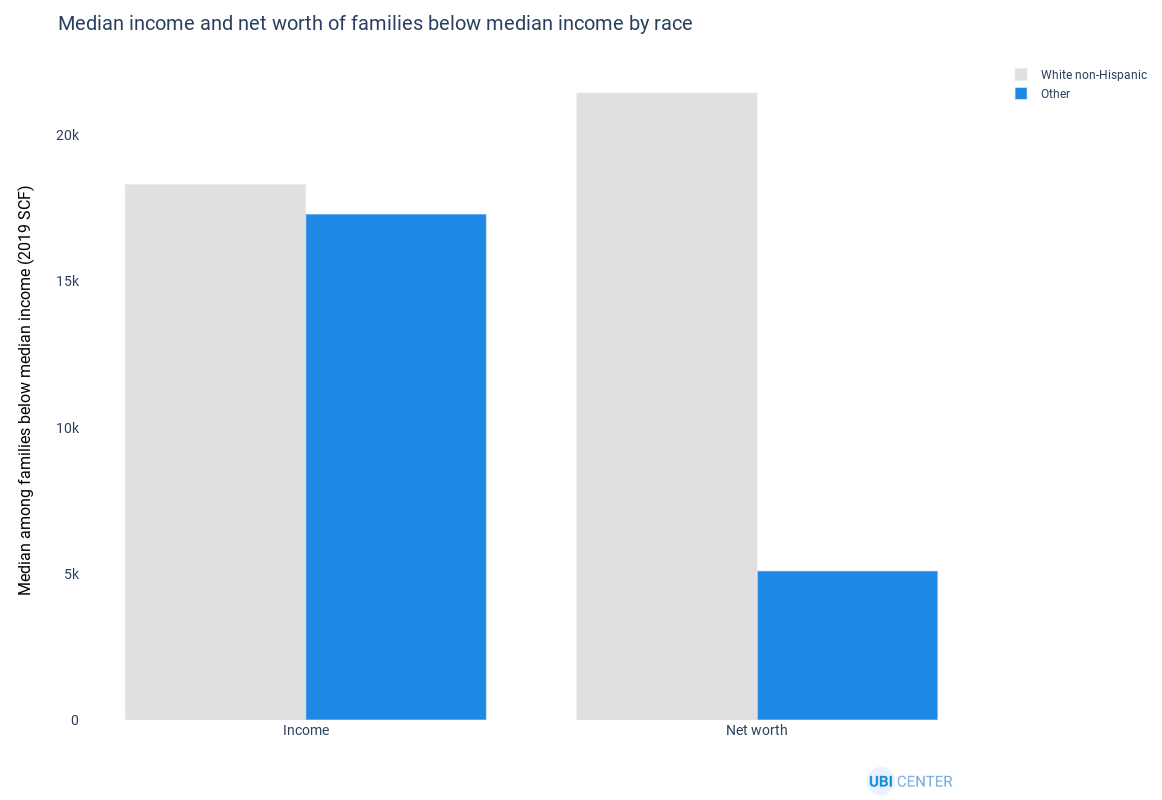

In [3]:
import numpy as np
import pandas as pd
import scf
import microdf as mdf
import plotly.express as px
import ubicenter

d = scf.load(2019, ["networth", "income", "race"])

d["whitenh"] = np.where(d.race == 1, "White non-Hispanic", "Other")
d_poor = d[d.income < (mdf.weighted_median(d, "income", "wgt") / 2)]
summary = pd.DataFrame({"Income": mdf.weighted_median(d_poor, "income", "wgt", "whitenh"),
                        "Net worth": mdf.weighted_median(d_poor, "networth", "wgt", "whitenh")})
summary.reset_index(inplace=True)
summary_long = summary.melt("whitenh").sort_values("whitenh", ascending=False)

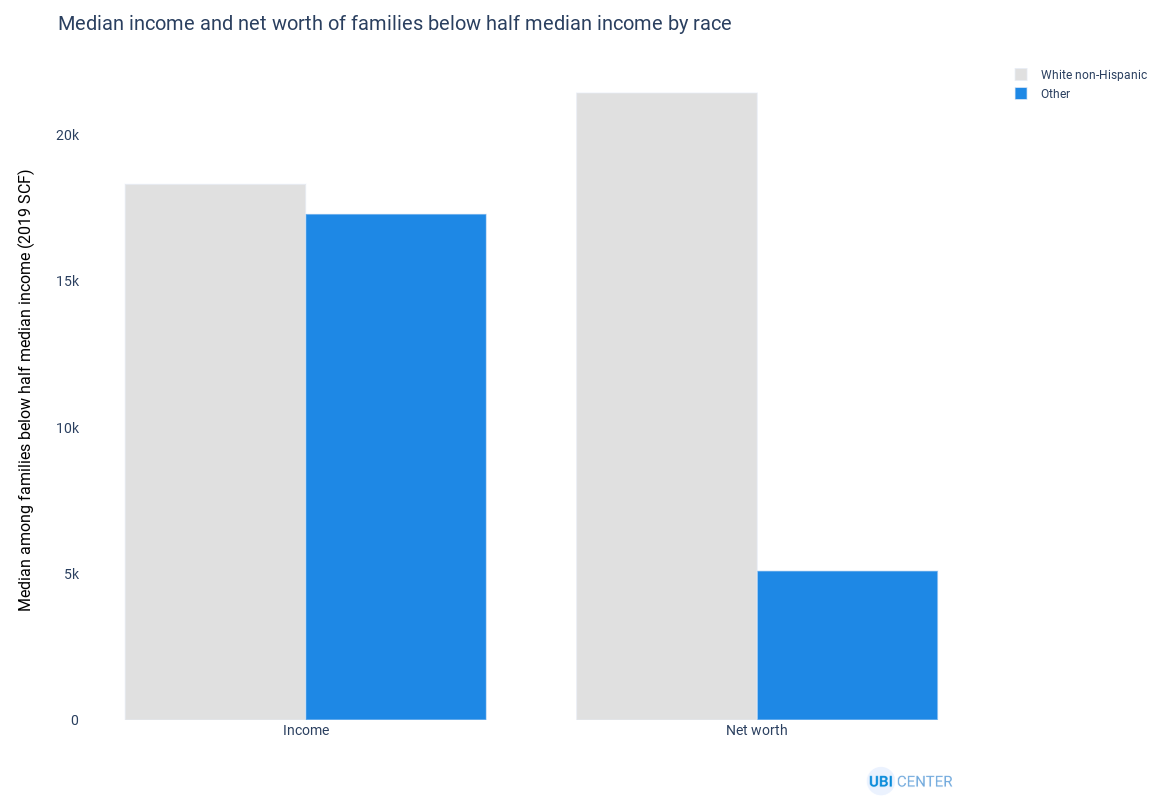

In [5]:

fig = px.bar(summary_long, x="variable", y="value", color="whitenh", barmode="group",
             labels={"whitenh": "Race/ethnicity", "variable": "Variable", "value": "Value"},
             color_discrete_map={"White non-Hispanic": "#E0E0E0", "Other": "#1E88E5"})
fig.update_layout(title="Median income and net worth of families below half median income by race",
                  yaxis=dict(title="Median among families below half median income (2019 SCF)"),
                  xaxis=dict(title=""),
                  legend=dict(title=""))
ubicenter.format_fig(fig)